In [2]:
import cv2
import matplotlib.pyplot as plt 
import glob
import tqdm
import math
import pandas as pd

update everytime:

In [4]:
filepath = '/Users/catherinebreen/Documents/Chapter1/other_snowpoles/TWISP-R-01' ## images to process

update once:

In [5]:
savepath = '/Users/catherinebreen/Documents/Chapter1/other_snowpoles' ## where to save the .csv of labels

In [11]:
# we will use glob from the package glob to make a list of all the files in our folder
dir = glob.glob(f"{filepath}/*") ##  

In [13]:
cameraNumber = filepath.split('/')[-1] ## get the camera number (could also use folder)
print(cameraNumber)

TWISP-R-01


  0%|          | 0/22 [00:00<?, ?it/s]

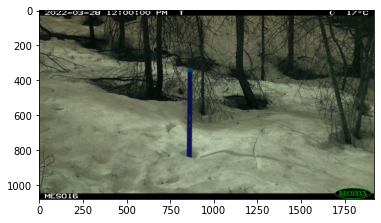

/var/folders/yv/mzlh10ts71lg0nhr7pw_0q080000gn/T/ipykernel_4747/4116443623.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  top, bottom = plt.ginput(2)
  0%|          | 0/22 [00:36<?, ?it/s]


ValueError: not enough values to unpack (expected 2, got 0)

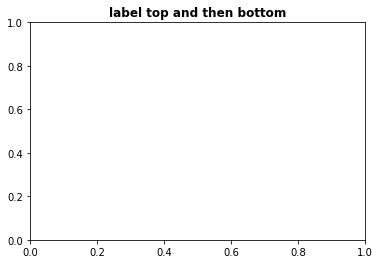

In [17]:
filename = []
PixelLengths = []
topX, topY, bottomX, bottomY = [],[],[],[]
#creationTimes = []

for file in tqdm.tqdm(dir): 
    img = cv2.imread(file) # read in image
    plt.imshow(img) # shows user the file as an image
    plt.show()
    plt.title('label top and then bottom', fontweight = "bold")
    top, bottom = plt.ginput(2)
    topX.append(top[0]), topY.append(top[1])
    bottomX.append(bottom[0]), bottomY.append(bottom[1])
    plt.close()

    PixelLength = math.dist(top,bottom) # calculates the length from the coordinates
    PixelLengths.append(PixelLength)

    filename.append(file.split('/')[-1])
        # IPython.embed()
        # creationTime = os.path.getctime(file)
        # dt_c = datetime.datetime.fromtimestamp(creationTime)
        # creationTimes.append(dt_c)
        
df = pd.DataFrame({'filename':filename, 'topX':topX,'topY':topY, 'bottomX':bottomX, 'bottomY':bottomY, 'PixelLengths':PixelLengths })
df.to_csv(f'{savepath}/{cameraNumber}_validation.csv')
